Linear Regression
 MSE: 0.54
 R2 Score: 0.59

Ridge Regression
 MSE Ridge: 0.54
 R2 Score: 0.60

Lasso Regression
 MSE Lasso: 0.53
 R2 Score: 0.60

ElasticNet Regression
 MSE Elastic: 0.56
 R2 Score: 0.57


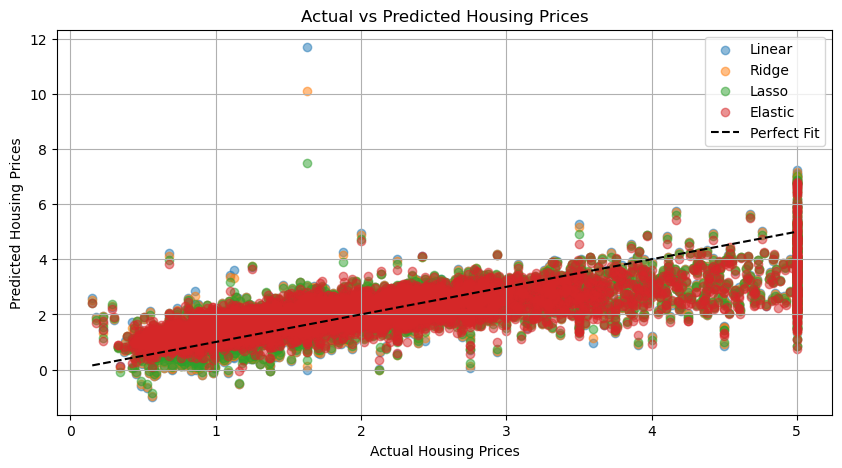

Model Evaluation Summary


,Model,Mean Squared Error (MSE),R2 Score
0,Linear,0.54,0.59
1,Ridge,0.54,0.60
2,Lasso,0.53,0.60
3,ElasticNet,0.56,0.57


In [22]:
## 1. Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

## 2. Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y= data.target

## 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4. Train Models
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# ElasticNet Regression
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)

## 5. Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Linear Regression")
print(f" MSE: {mse_lr:.2f}")
print(f" R2 Score: {r2_lr:.2f}\n")

print("Ridge Regression")
print(f" MSE Ridge: {mse_ridge:.2f}")
print(f" R2 Score: {r2_ridge:.2f}\n")

print("Lasso Regression")
print(f" MSE Lasso: {mse_lasso:.2f}")
print(f" R2 Score: {r2_lasso:.2f}\n")

print("ElasticNet Regression")
print(f" MSE Elastic: {mse_elastic:.2f}")
print(f" R2 Score: {r2_elastic:.2f}")

## 6. Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.scatter(y_test, y_pred_elastic, alpha=0.5, label='Elastic')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Perfect Fit") 
plt.xlabel("Actual Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()

results_df = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
    'Mean Squared Error (MSE)' : [mse_lr, mse_ridge, mse_lasso, mse_elastic],
    'R2 Score' : [r2_lr, r2_ridge, r2_lasso, r2_elastic]
})

# Round values for readability
results_df["Mean Squared Error (MSE)"] = results_df["Mean Squared Error (MSE)"].round(2)
results_df["R2 Score"] = results_df["R2 Score"].round(2)

# Display the table 
from IPython.display import display

print("Model Evaluation Summary")
display(results_df)